In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    precision_recall_curve,
    average_precision_score,
)
import lightgbm as lgb

SEED = 1284
np.random.seed(SEED)

# グラフのレイアウトに関して
sns.set_style("whitegrid")

sns.set_context("notebook")
sns.set_palette("pastel")
default_palette = sns.color_palette("pastel")


In [5]:
# load dataset
# df_master = pd.read_csv("../data/20240531_processed_anomalydata.csv", na_values=["NaN"])

from ucimlrepo import fetch_ucirepo

# fetch dataset
ai4i_2020_predictive_maintenance_dataset = fetch_ucirepo(id=601)
df_master = ai4i_2020_predictive_maintenance_dataset.data.original.drop(
    columns=["Product ID", "TWF", "HDF", "PWF", "OSF", "RNF"]
)

df_master.columns = [
    "uid",
    "product_type",
    "air_temperature_k",
    "process_temperature_k",
    "rotational_speed_rpm",
    "torque_nm",
    "tool_wear_min",
    "machine_failure",
]

In [10]:
df_master.head()

,uid,product_type,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min,machine_failure
0,1,M,298.1,308.6,1551,42.8,0,0
1,2,L,298.2,308.7,1408,46.3,3,0
2,3,L,298.1,308.5,1498,49.4,5,0
3,4,L,298.2,308.6,1433,39.5,7,0
4,5,L,298.2,308.7,1408,40.0,9,0


In [ ]:
df = df_master.copy()

oe = OrdinalEncoder(categories=[["L", "M", "H"]])

df["product_type"] = oe.fit_transform(df[["product_type"]])

In [17]:
df.describe()

,uid,product_type,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min,machine_failure
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,0.500300,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,0.671301,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,0.000000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,0.000000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,0.000000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,1.000000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,2.000000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


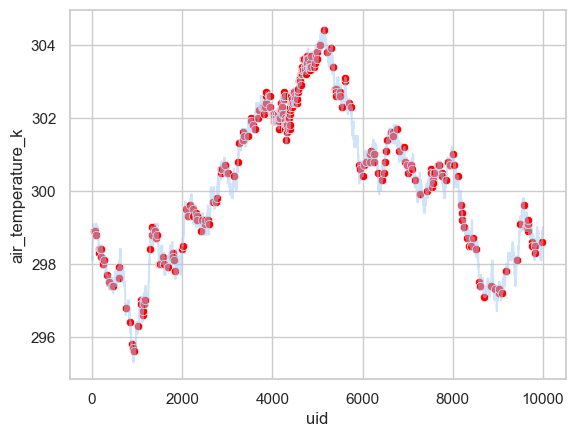

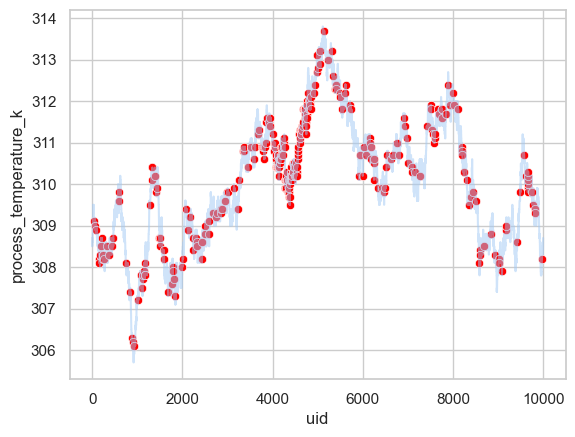

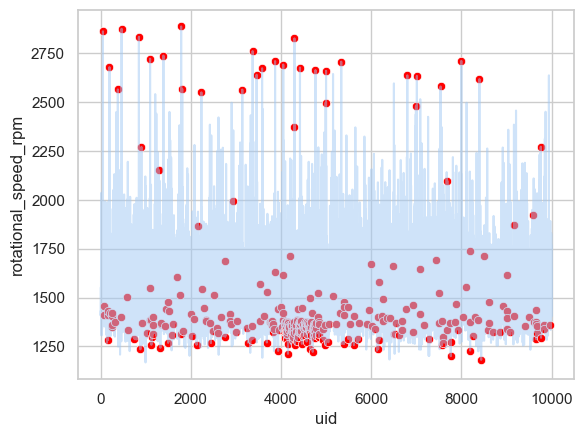

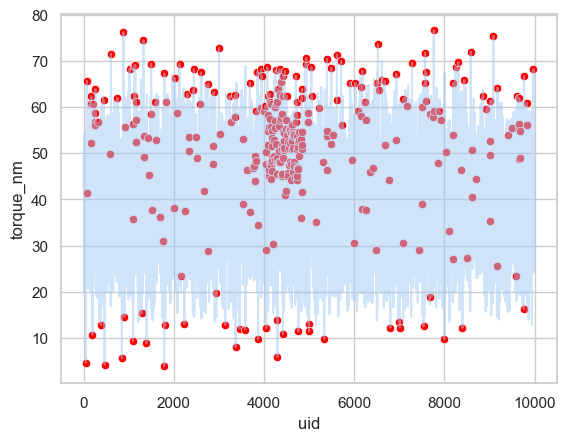

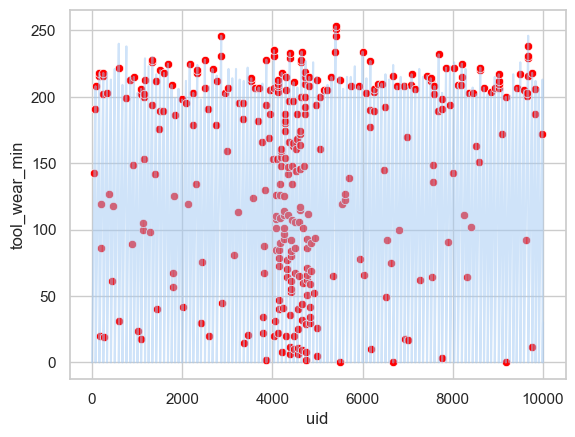

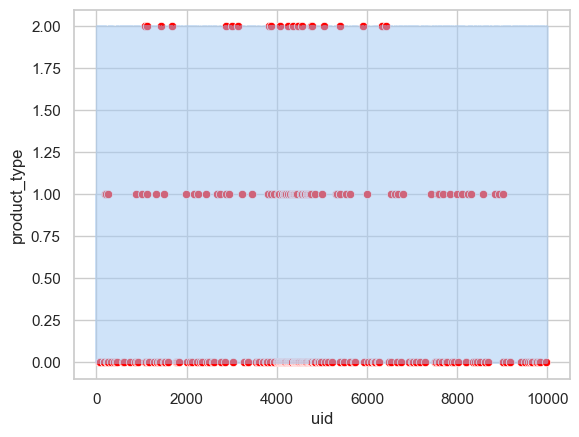

In [29]:
for var in [
    "air_temperature_k",
    "process_temperature_k",
    "rotational_speed_rpm",
    "torque_nm",
    "tool_wear_min",
    "product_type",
]:
    sns.lineplot(data=df, x="uid", y=var, alpha=0.5)
    sns.scatterplot(data=df.query("machine_failure == 1"), x="uid", y=var, color="red")

    plt.show()

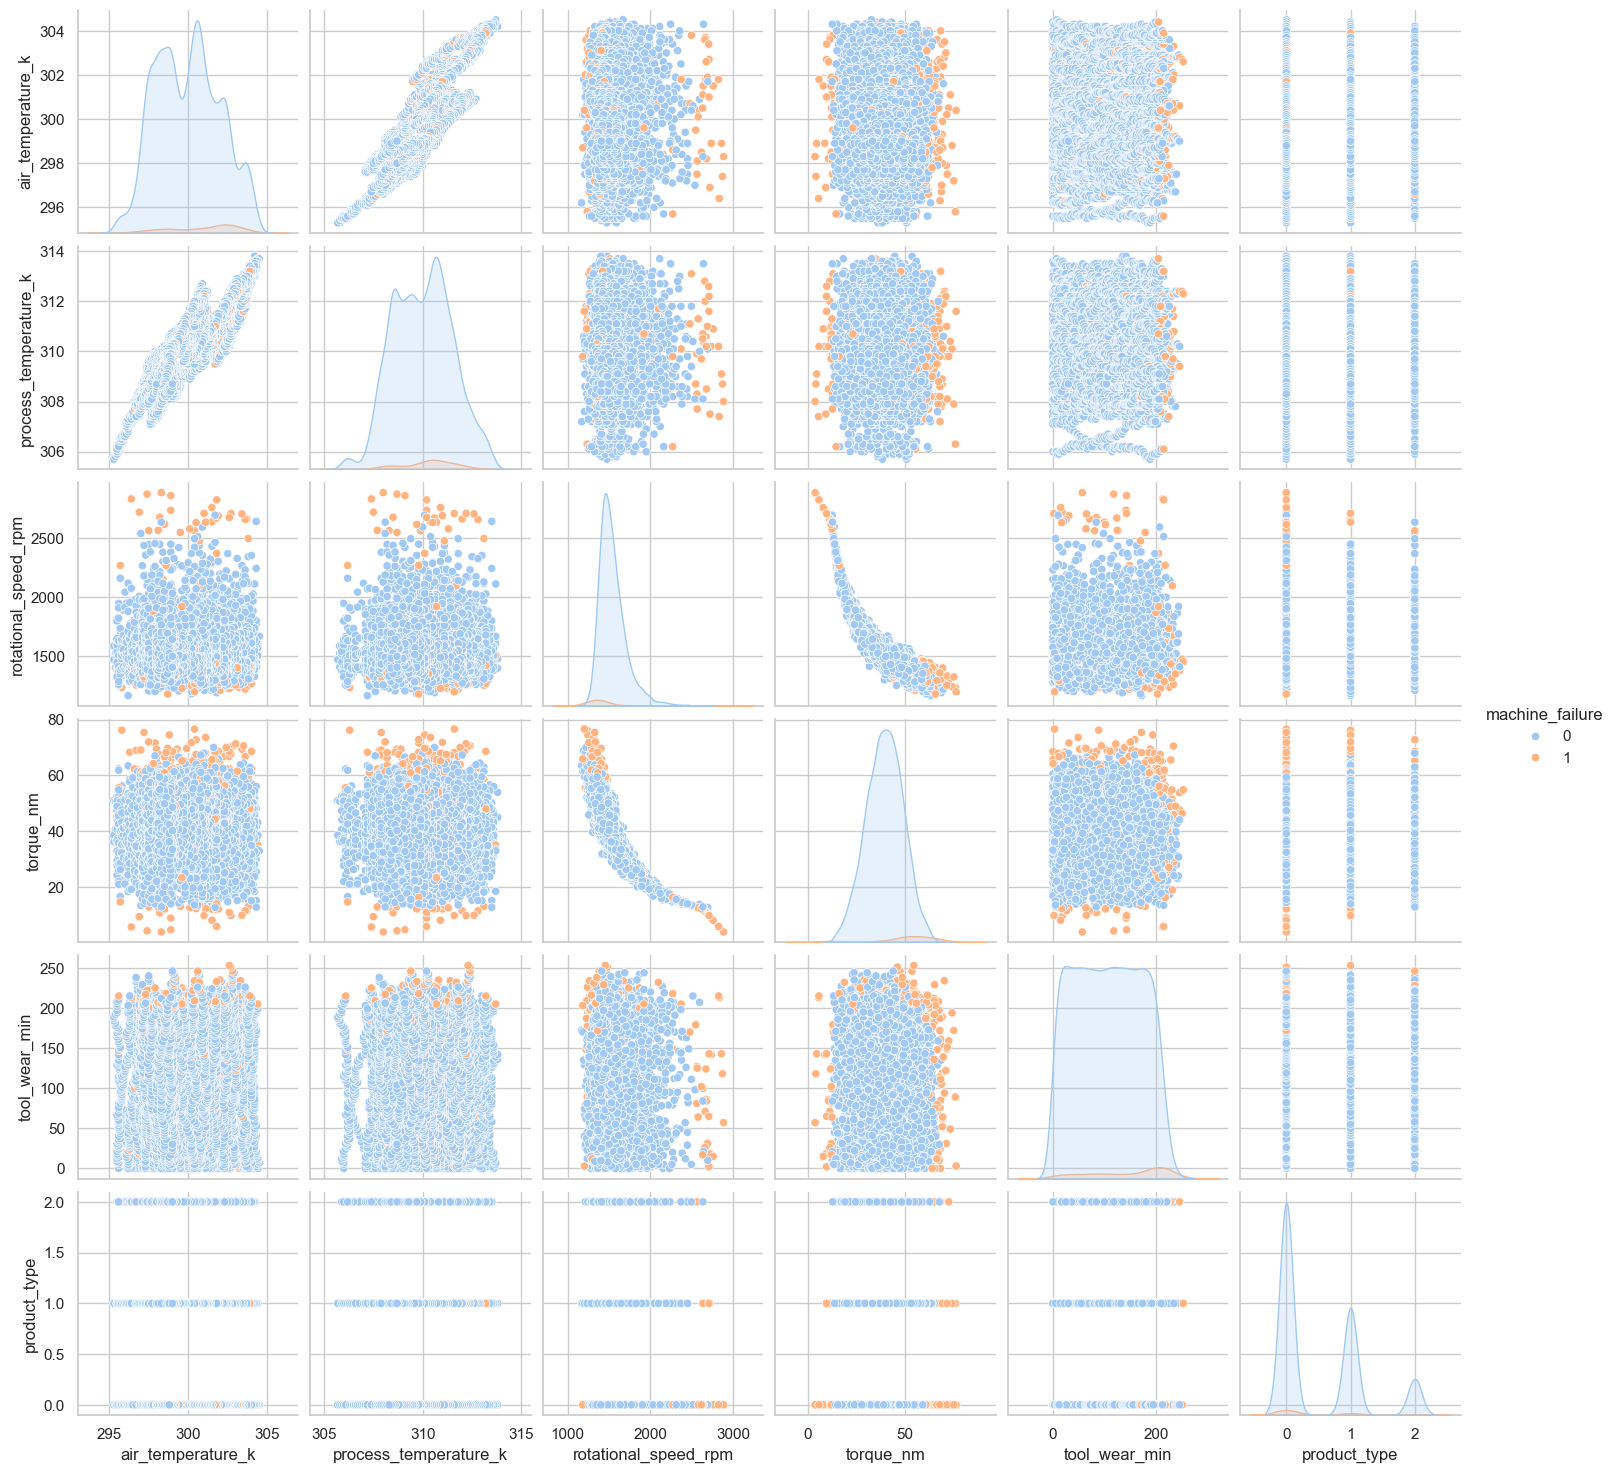

In [18]:
sns.pairplot(
    data=df[
        [
            "air_temperature_k",
            "process_temperature_k",
            "rotational_speed_rpm",
            "torque_nm",
            "tool_wear_min",
            "product_type",
            "machine_failure",
        ]
    ],
    hue="machine_failure",
)



Fold 1
[LightGBM] [Info] Number of positive: 243, number of negative: 6957
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000357 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 921
[LightGBM] [Info] Number of data points in the train set: 7200, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.033750 -> initscore=-3.354442
[LightGBM] [Info] Start training from score -3.354442
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[12]	training's auc: 0.989402	valid_1's auc: 0.969328

Validation Metrics:
accuracy: 0.9712
precision: 1.0000
recall: 0.1786
f1: 0.3030
auc: 0.9693
ap: 0.7887

Fold 2
[LightGBM] [Info] Number of positive: 244, number of negative: 6956
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000278 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] 

/Users/argon/dev/temporary_analysis/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Early stopping, best iteration is:
[1]	training's auc: 0.977901	valid_1's auc: 0.974702

Validation Metrics:
accuracy: 0.9663
precision: 0.0000
recall: 0.0000
f1: 0.0000
auc: 0.9747
ap: 0.7504

Fold 5
[LightGBM] [Info] Number of positive: 244, number of negative: 6956
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000260 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 923
[LightGBM] [Info] Number of data points in the train set: 7200, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.033889 -> initscore=-3.350192
[LightGBM] [Info] Start training from score -3.350192
Training until validation scores don't improve for 50 rounds


/Users/argon/dev/temporary_analysis/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Early stopping, best iteration is:
[10]	training's auc: 0.988925	valid_1's auc: 0.980427

Validation Metrics:
accuracy: 0.9675
precision: 1.0000
recall: 0.0370
f1: 0.0714
auc: 0.9804
ap: 0.7842

Fold 6
[LightGBM] [Info] Number of positive: 244, number of negative: 6956
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000250 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 922
[LightGBM] [Info] Number of data points in the train set: 7200, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.033889 -> initscore=-3.350192
[LightGBM] [Info] Start training from score -3.350192
Training until validation scores don't improve for 50 rounds
[100]	training's auc: 0.999996	valid_1's auc: 0.969862
[200]	training's auc: 1	valid_1's auc: 0.977385
[300]	training's auc: 1	valid_1's auc: 0.979014
Early stopping, best iteration is:
[283]	training's auc: 1	valid_1's auc: 0.979876

Validation Met

/Users/argon/dev/temporary_analysis/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Early stopping, best iteration is:
[22]	training's auc: 0.992787	valid_1's auc: 0.959226

Validation Metrics:
accuracy: 0.9800
precision: 1.0000
recall: 0.4074
f1: 0.5789
auc: 0.9592
ap: 0.8198

Fold 9
[LightGBM] [Info] Number of positive: 244, number of negative: 6956
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000280 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 919
[LightGBM] [Info] Number of data points in the train set: 7200, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.033889 -> initscore=-3.350192
[LightGBM] [Info] Start training from score -3.350192
Training until validation scores don't improve for 50 rounds
[100]	training's auc: 0.999988	valid_1's auc: 0.989076
Early stopping, best iteration is:
[125]	training's auc: 1	valid_1's auc: 0.989842

Validation Metrics:
accuracy: 0.9850
precision: 0.8571
recall: 0.6667
f1: 0.7500
auc: 0.9898
ap: 0.8708

Fold 

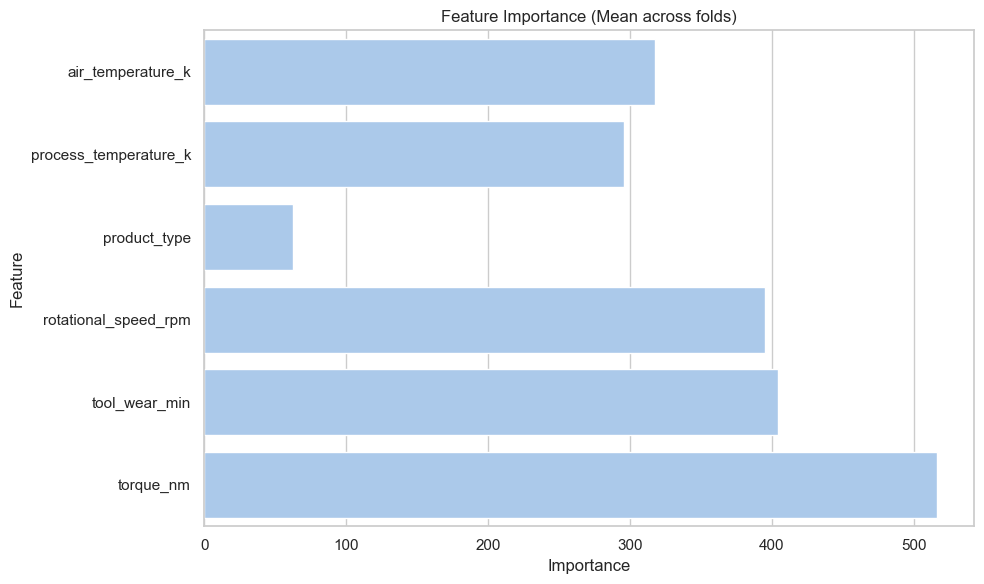

[LightGBM] [Info] Number of positive: 271, number of negative: 7729
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000384 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 924
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.033875 -> initscore=-3.350616
[LightGBM] [Info] Start training from score -3.350616
Training until validation scores don't improve for 50 rounds
[100]	training's auc: 0.999972	valid_1's auc: 0.969682
Early stopping, best iteration is:
[132]	training's auc: 1	valid_1's auc: 0.972796

Test set performance:
Accuracy: 0.9875
Precision: 0.9057
Recall: 0.7059
F1-score: 0.7934
AUC-ROC: 0.9728
Average Precision: 0.8103

Shape of final results DataFrame: (82000, 6)

Columns in results DataFrame: ['fold', 'index', 'pred_proba', 'prediction', 'actual', 'is_train']

Sample of results DataFrame:
     f

In [31]:
# 特徴量とターゲットを分割
X = df.drop(["uid", "machine_failure"], axis=1)
y = df["machine_failure"]

# トレーニングデータとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=SEED, stratify=y
)

# トレーニングデータとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=SEED, stratify=y
)

# CV結果を保存するデータフレームを作成
cv_results = pd.DataFrame({"index": X_train.index, "actual": y_train})

# LightGBMのパラメータ設定
params = {
    "objective": "binary",
    "metric": "auc",
    "boosting_type": "gbdt",
    "num_leaves": 31,
    "learning_rate": 0.05,
    "feature_fraction": 0.9,
    "random_state": SEED,
}

# クロスバリデーションの設定
n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=SEED)

# 特徴量の重要度を保存するデータフレーム
feature_importance_df = pd.DataFrame()

# 各foldの結果を格納するリスト
fold_results = []

# クロスバリデーションを実行
for fold, (train_idx, valid_idx) in enumerate(skf.split(X_train, y_train), 1):
    print(f"\nFold {fold}")

    # データの準備
    X_tr = X_train.iloc[train_idx]
    y_tr = y_train.iloc[train_idx]
    X_val = X_train.iloc[valid_idx]
    y_val = y_train.iloc[valid_idx]

    # LightGBMのデータセット作成
    train_data = lgb.Dataset(X_tr, label=y_tr)
    valid_data = lgb.Dataset(X_val, label=y_val, reference=train_data)

    # モデルの学習
    model = lgb.train(
        params,
        train_data,
        valid_sets=[train_data, valid_data],
        num_boost_round=1000,
        callbacks=[
            lgb.early_stopping(stopping_rounds=50),
            lgb.log_evaluation(period=100),
        ],
    )

    # 予測
    y_pred = model.predict(X_val)
    y_pred_binary = (y_pred > 0.5).astype(int)

    # フォールドの結果を保存
    fold_df = pd.DataFrame(
        {
            "fold": fold,
            "index": X_train.index[valid_idx],
            "pred_proba": y_pred,
            "prediction": y_pred_binary,
            "actual": y_val.values,
            "is_train": False,
        }
    )

    # 訓練データの予測も保存
    train_pred = model.predict(X_tr)
    train_fold_df = pd.DataFrame(
        {
            "fold": fold,
            "index": X_train.index[train_idx],
            "pred_proba": train_pred,
            "prediction": (train_pred > 0.5).astype(int),
            "actual": y_tr.values,
            "is_train": True,
        }
    )

    fold_results.append(pd.concat([fold_df, train_fold_df]))

    # 評価指標の計算と表示
    fold_metrics = {
        "accuracy": accuracy_score(y_val, y_pred_binary),
        "precision": precision_score(y_val, y_pred_binary),
        "recall": recall_score(y_val, y_pred_binary),
        "f1": f1_score(y_val, y_pred_binary),
        "auc": roc_auc_score(y_val, y_pred),
        "ap": average_precision_score(y_val, y_pred),
    }

    print("\nValidation Metrics:")
    for metric, value in fold_metrics.items():
        print(f"{metric}: {value:.4f}")

    # 特徴量の重要度を保存
    fold_importance = pd.DataFrame(
        {
            "feature": X_train.columns,
            "importance": model.feature_importance(),
            "fold": fold,
        }
    )
    feature_importance_df = pd.concat([feature_importance_df, fold_importance], axis=0)

# 全フォールドの結果を1つのデータフレームにまとめる
all_fold_results = pd.concat(fold_results)

# インデックスでソート
all_fold_results = all_fold_results.sort_values("index")

# 元のtrainデータとマージするための準備
cv_predictions = all_fold_results.copy()

# 特徴量の重要度を可視化
plt.figure(figsize=(10, 6))
sns.barplot(
    data=feature_importance_df.groupby("feature")["importance"].mean().reset_index(),
    x="importance",
    y="feature",
)
plt.title("Feature Importance (Mean across folds)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# 最終モデルの学習とテストデータでの評価
train_data_final = lgb.Dataset(X_train, label=y_train)
test_data_final = lgb.Dataset(X_test, label=y_test, reference=train_data_final)

final_model = lgb.train(
    params,
    train_data_final,
    valid_sets=[train_data_final, test_data_final],
    num_boost_round=1000,
    callbacks=[lgb.early_stopping(stopping_rounds=50), lgb.log_evaluation(period=100)],
)

# テストデータでの予測
test_proba = final_model.predict(X_test)
test_predictions = (test_proba > 0.5).astype(int)

# テストデータの結果も保存
test_results = pd.DataFrame(
    {
        "fold": "test",
        "index": X_test.index,
        "pred_proba": test_proba,
        "prediction": test_predictions,
        "actual": y_test.values,
        "is_train": False,
    }
)

print("\nTest set performance:")
print(f"Accuracy: {accuracy_score(y_test, test_predictions):.4f}")
print(f"Precision: {precision_score(y_test, test_predictions):.4f}")
print(f"Recall: {recall_score(y_test, test_predictions):.4f}")
print(f"F1-score: {f1_score(y_test, test_predictions):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, test_proba):.4f}")
print(f"Average Precision: {average_precision_score(y_test, test_proba):.4f}")

# 全ての結果を1つのデータフレームにまとめる
all_results = pd.concat([all_fold_results, test_results])

print("\nShape of final results DataFrame:", all_results.shape)
print("\nColumns in results DataFrame:", all_results.columns.tolist())

# 結果の確認
print("\nSample of results DataFrame:")
print(all_results.head())

In [ ]:
all_results

In [34]:
all_results.fold.unique()

array([10, 8, 5, 9, 6, 3, 7, 2, 1, 4, 'test'], dtype=object)

<Axes: xlabel='pred_proba', ylabel='Density'>

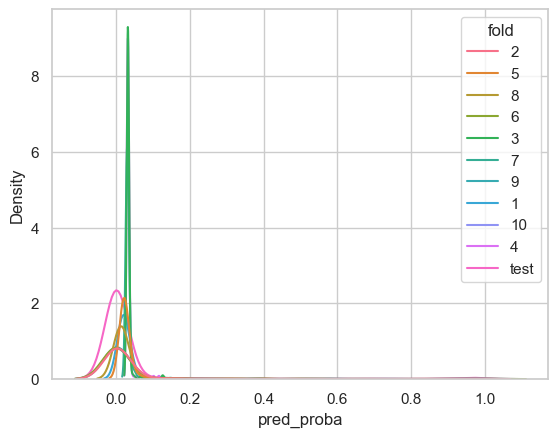

In [ ]:
sns.kdeplot(data=all_results.query("~is_train"), x="pred_proba", hue="fold")


In [47]:
all_results.query("~is_train").groupby("fold").pred_proba.agg(
    ["min", "max", "median", "mean", "std"]
).sort_values(by="std", ascending=False)

,min,max,median,mean,std
fold,,,,,
test,0.000063,0.998124,0.000458,0.030870,0.144339
6,0.000001,0.999439,0.000034,0.025297,0.140802
10,0.000077,0.995939,0.000320,0.030142,0.139895
2,0.000916,0.959546,0.002204,0.033933,0.137785
9,0.000109,0.988170,0.000428,0.029365,0.134467
8,0.011770,0.674530,0.012565,0.030022,0.079513
1,0.018756,0.579207,0.019453,0.034953,0.064552
5,0.021048,0.531579,0.021367,0.033954,0.049824
7,0.030659,0.199733,0.030759,0.034720,0.017513


In [51]:
df_fold_6 = all_results.query("fold==6").join(
    df.rename({"uid": "index"}), on="index", how="left"
)

df_fold_3 = all_results.query("fold==3").join(
    df.rename({"uid": "index"}), on="index", how="left"
)

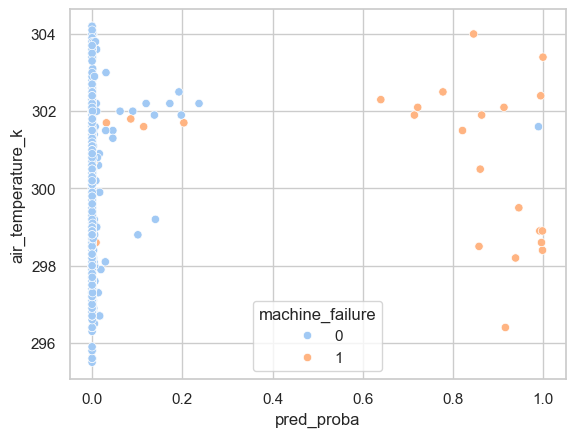

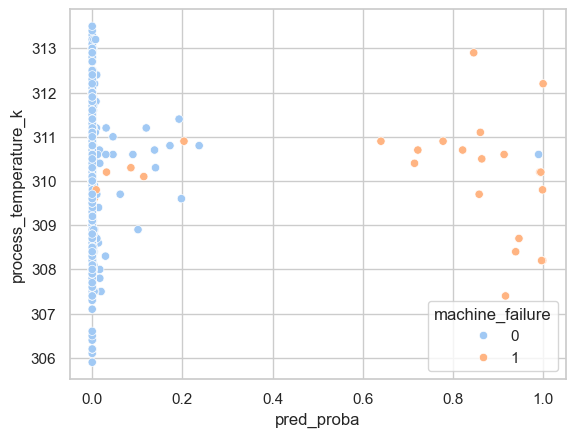

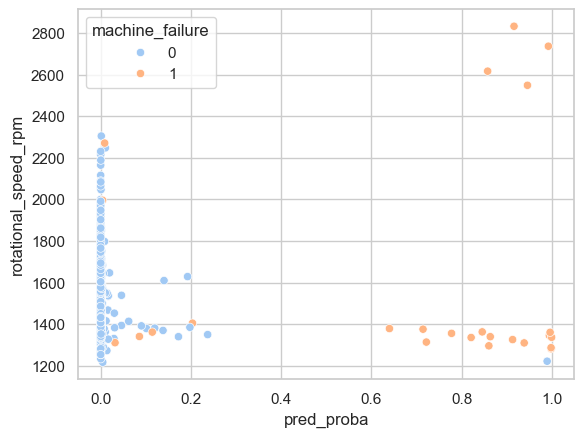

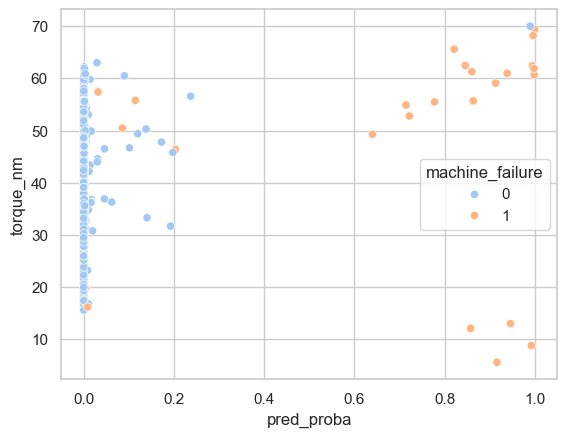

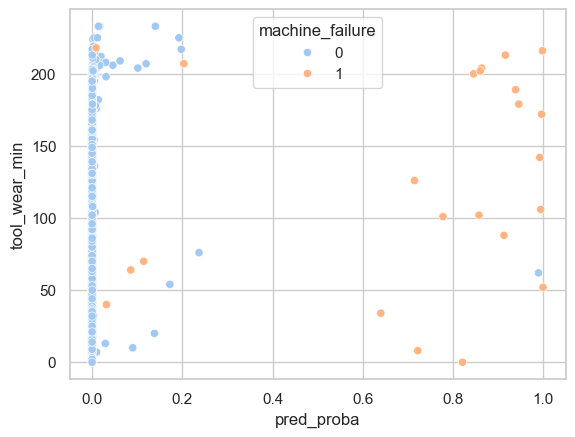

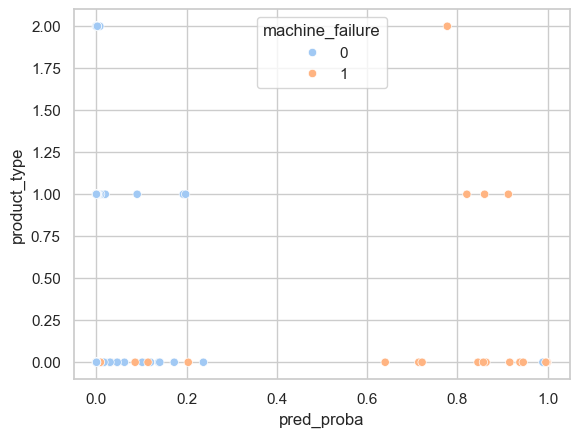

In [53]:
for var in [
    "air_temperature_k",
    "process_temperature_k",
    "rotational_speed_rpm",
    "torque_nm",
    "tool_wear_min",
    "product_type",
]:
    sns.scatterplot(
        data=df_fold_6.query("~is_train"), x="pred_proba", y=var, hue="machine_failure"
    )
    plt.show()

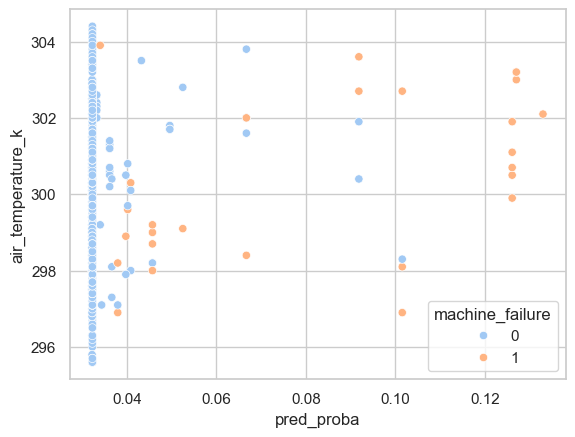

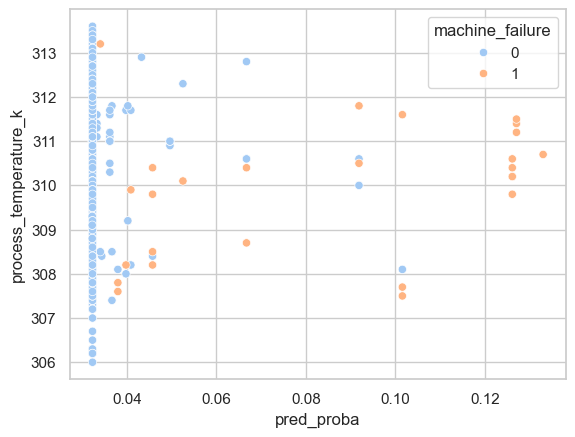

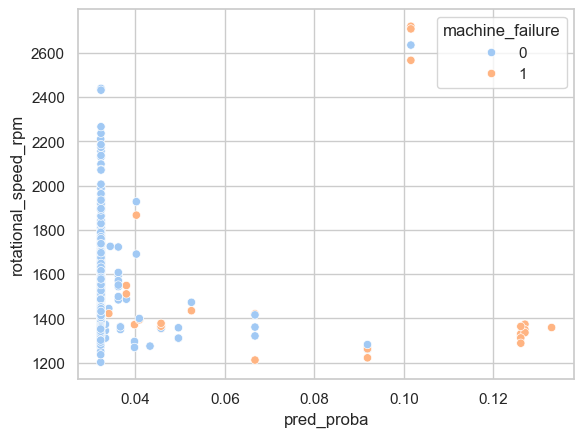

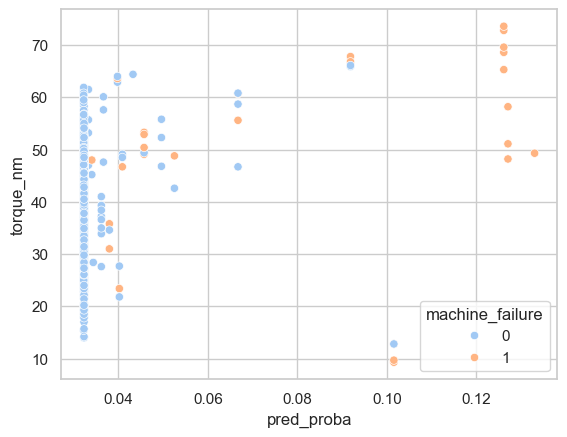

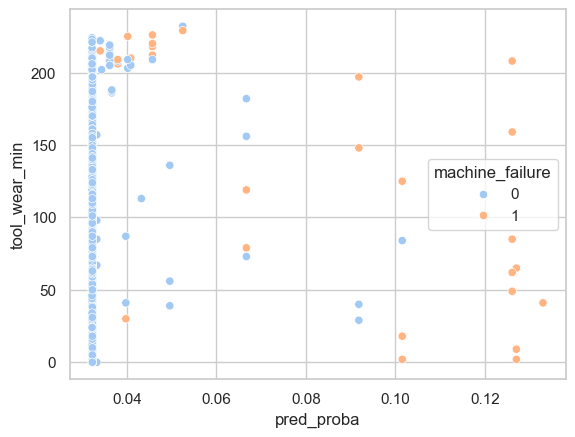

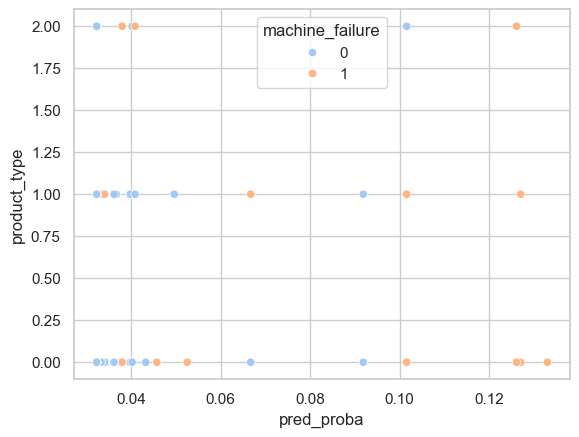

In [ ]:
for var in [
    "air_temperature_k",
    "process_temperature_k",
    "rotational_speed_rpm",
    "torque_nm",
    "tool_wear_min",
    "product_type",
]:
    sns.scatterplot(
        data=df_fold_3.query("~is_train"), x="pred_proba", y=var, hue="machine_failure"
    )
    plt.show()

In [ ]:
df